<a href="https://colab.research.google.com/github/Samiratu/DataMining_Visualizations/blob/main/assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/My Drive/data_assign1_dm/College.csv')
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


Data Preprocessing

In [ ]:
df.shape

(777, 19)

In [ ]:
df.describe

<bound method NDFrame.describe of      university  Private   Apps  ...  perc_alumni  Expend  grad_rate
0             0        1   1660  ...           12    7041         60
1             1        1   2186  ...           16   10527         56
2             2        1   1428  ...           30    8735         54
3             3        1    417  ...           37   19016         59
4             4        1    193  ...            2   10922         15
..          ...      ...    ...  ...          ...     ...        ...
772         772        0   2197  ...           14    4469         40
773         773        1   1959  ...           31    9189         83
774         774        1   2097  ...           20    8323         49
775         775        1  10705  ...           49   40386         99
776         776        1   2989  ...           28    4509         99

[777 rows x 19 columns]>

In [ ]:
df.rename(columns = {"Unnamed: 0":"university", "Room.Board":"room_board", "Grad.Rate":"grad_rate", "P.Undergrad":"p_undergrad", "F.Undergrad":"f_undergrad","perc.alumni":"perc_alumni", "S.F.Ratio":"sf_ratio"}, inplace=True)

In [ ]:
missing_values = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column': df.columns,'percent_missing': missing_values})
missing_value_df.sort_values('percent_missing', inplace=True)
print(missing_value_df)

                  column  percent_missing
university    university              0.0
perc_alumni  perc_alumni              0.0
sf_ratio        sf_ratio              0.0
Terminal        Terminal              0.0
PhD                  PhD              0.0
Personal        Personal              0.0
Books              Books              0.0
room_board    room_board              0.0
Expend            Expend              0.0
Outstate        Outstate              0.0
f_undergrad  f_undergrad              0.0
Top25perc      Top25perc              0.0
Top10perc      Top10perc              0.0
Enroll            Enroll              0.0
Accept            Accept              0.0
Apps                Apps              0.0
Private          Private              0.0
p_undergrad  p_undergrad              0.0
grad_rate      grad_rate              0.0


There are no missing values in our dataset

## Encode the Private Column by replacing Yes with 1 and No with 0

In [ ]:
df['Private'] = df['Private'].map({'Yes': 1, 'No': 0})

### Scatter Plots of Room and board costs vs Graduation rate colored by private school

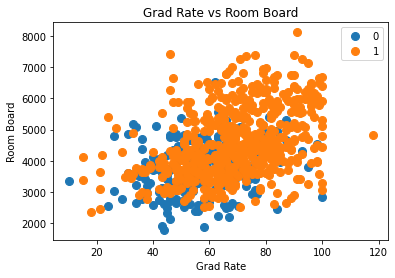

In [ ]:
groups = df.groupby('Private')
for name, group in groups:
  plt.title("Grad Rate vs Room Board")
  plt.xlabel("Grad Rate")
  plt.ylabel("Room Board")
  plt.plot(group.grad_rate, group.room_board, marker='o', linestyle='', markersize=8, label=name)

plt.legend()

From the plot above we can conclude that Private schools have a high graduation rate as well as cost of room and board.

### Scatter plot showing Fulltime Unergraduate vs Out-ot-state tuition  colored by private school

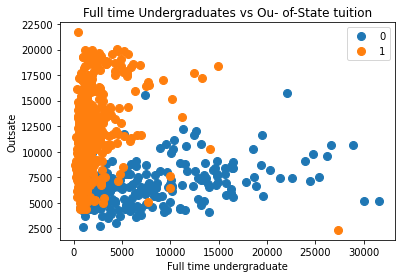

In [ ]:
groups = df.groupby('Private')
for name, group in groups:
  plt.title("Full time Undergraduates vs Ou- of-State tuition")
  plt.xlabel("Full time undergraduate")
  plt.ylabel("Outsate")
  plt.plot(group.f_undergrad, group.Outstate, marker='o', linestyle='', markersize=8, label=name)

plt.legend()

From the plot above I can conclude that private schoold have high out-of-stae tuition and fewer full -time undergraduates

### Distribution of Out-of-State Tuition based amon private and non-private institutions

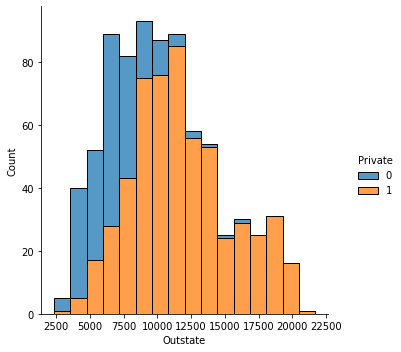

In [ ]:

sns.displot(df, x="Outstate", hue="Private", multiple="stack")



From the plot above we can see that private schools have a high Out-of- state tuition

### Distribution of graduation rate among private and non-private institutions

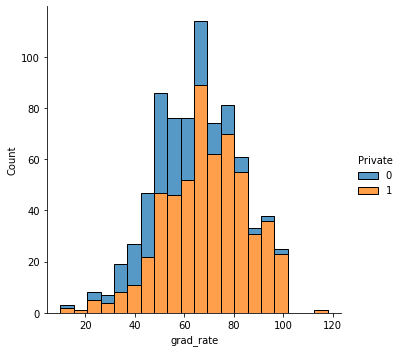

In [ ]:
sns.displot(df, x="grad_rate", hue="Private", multiple="stack")

From the above we can wee that most private universities have a high graduation rate.

### Pivate University with graduation rate greater that 100 percent

In [ ]:
df[df["grad_rate"]>100]

,university,Private,Apps,Accept,Enroll,Top10perc,Top25perc,f_undergrad,p_undergrad,Outstate,room_board,Books,Personal,PhD,Terminal,sf_ratio,perc_alumni,Expend,grad_rate
95,Cazenovia College,1,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


### Cazenovia College has a graduation rate greater than 100 %. I will be sellint it below to 100% since pecentage can't be more that a hundred.

In [ ]:
df['grad_rate']['Cazenovia College'] = 100

### Ecode University column since it is a string

In [ ]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df['university']= label_encoder.fit_transform(df['university']) 

# Agglomerative Clustering Classification technique.

In [ ]:
# ImportAgglomerativeClustering from SciKit Learn.

from sklearn.cluster import AgglomerativeClustering

# Create an instance of aAgglomerativeClustering model with 2 clusters.
model = AgglomerativeClustering(n_clusters=2)

### Fit the model to all the data

In [ ]:
 # Fit the model to all the data except for the Private label.

model.fit(df)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)

# Model Evaluation

### Confusion Matrix

In [ ]:
# Create a confusion matrix and classification report to see how well the Kmeans clustering worked without being given any labels.

from sklearn.metrics import confusion_matrix, classification_report
# print (confusion_matrix(df['Private'],model.labels_))
cm = confusion_matrix(df['Private'],model.labels_)
cm


array([[ 69, 143],
       [553,  12]])

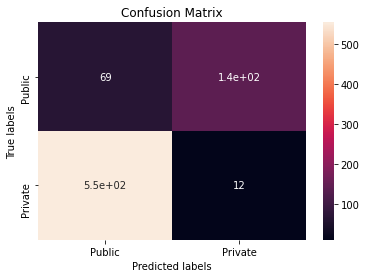

In [ ]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Public', 'Private']); ax.yaxis.set_ticklabels(['Public', 'Private']);

### Classification Report

In [ ]:
print("\n")
print (classification_report(df['Private'],model.labels_))



              precision    recall  f1-score   support

           0       0.11      0.33      0.17       212
           1       0.08      0.02      0.03       565

    accuracy                           0.10       777
   macro avg       0.09      0.17      0.10       777
weighted avg       0.09      0.10      0.07       777

